# Demo for the OrbitalGraphs GAP package

This attempts to draw orbital graphs for groups $G \leq S_n$

In [2]:
LoadPackage("OrbitalGraphs");
LoadPackage("Francy");

true

true

In [3]:
# Input: an orbital graph
# Draws orbital graphs

DrawOrbitalGraph := function(OG)
    local canvas, fgraph, i, e, nodes, graphviz;
    
    # todo: make it possible to put a caption here
    canvas := Canvas(Concatenation("Orbital Graph of", ""));
    fgraph := Graph(GraphType.DIRECTED);
    Add(canvas, fgraph);

    nodes := [];

    for i in DigraphVertices(OG) do
        nodes[i] := Shape(ShapeType.CIRCLE, String(i));;
        Add(fgraph, nodes[i]);
    od;
    for i in [1..Length(nodes)-1] do
        e := Link(nodes[i], nodes[i+1]);
        SetInvisible(e, true);
        Add(fgraph, e);
    od;
    e := Link(nodes[Length(nodes)], nodes[1]);
    SetInvisible(e, true);
    Add(fgraph, e);

    for e in DigraphEdges(OG) do
        Add(fgraph, Link(nodes[e[1]], nodes[e[2]]));
    od;
    
    graphviz := FrancyRenderer(FrancyRendererType.GRAPHVIZ_CIRCO);
    Add(canvas, graphviz);

    return Draw(canvas);
end;

function( OG ) ... end

In [5]:
G := DihedralGroup(IsPermGroup, 16);
ogs := OrbitalGraphs(G);

Group([ (1,2,3,4,5,6,7,8), (2,8)(3,7)(4,6) ])

[ <self-paired orbital graph of Group([ (1,2,3,4,5,6,7,8), (2,8)(3,7)(4,6) ])      on 8 vertices with base-pair (1,5), 8 arcs>,   <self-paired orbital graph of Group([ (1,2,3,4,5,6,7,8), (2,8)(3,7)(4,6) ])      on 8 vertices with base-pair (1,2), 16 arcs>,   <self-paired orbital graph of Group([ (1,2,3,4,5,6,7,8), (2,8)(3,7)(4,6) ])      on 8 vertices with base-pair (1,3), 16 arcs>,   <self-paired orbital graph of Group([ (1,2,3,4,5,6,7,8), (2,8)(3,7)(4,6) ])      on 8 vertices with base-pair (1,4), 16 arcs> ]

In [6]:
# This seems to work quite ok
DrawOrbitalGraph(ogs[1]);

In [7]:
# This, not so much
DrawOrbitalGraph(ogs[2]);

In [9]:
G := DirectProduct(SymmetricGroup(3), CyclicGroup(IsPermGroup, 5));
ogs := OrbitalGraphs(G);

Group([ (1,2,3), (1,2), (4,5,6,7,8) ])

[ <orbital graph of Group([ (1,2,3), (1,2), (4,5,6,7,8) ]) on 8 vertices     with base-pair (4,5), 5 arcs>,   <orbital graph of Group([ (1,2,3), (1,2), (4,5,6,7,8) ]) on 8 vertices     with base-pair (4,6), 5 arcs>,   <orbital graph of Group([ (1,2,3), (1,2), (4,5,6,7,8) ]) on 8 vertices     with base-pair (4,7), 5 arcs>,   <orbital graph of Group([ (1,2,3), (1,2), (4,5,6,7,8) ]) on 8 vertices     with base-pair (4,8), 5 arcs>,   <self-paired orbital graph of Group([ (1,2,3), (1,2), (4,5,6,7,8) ]) on     8 vertices with base-pair (1,2), 6 arcs>,   <orbital graph of Group([ (1,2,3), (1,2), (4,5,6,7,8) ]) on 8 vertices     with base-pair (1,4), 15 arcs>,   <orbital graph of Group([ (1,2,3), (1,2), (4,5,6,7,8) ]) on 8 vertices     with base-pair (4,1), 15 arcs> ]

In [10]:
DrawOrbitalGraph(ogs[2]);

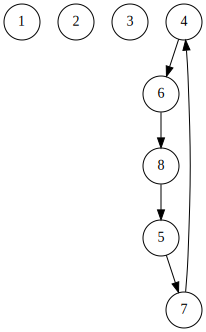

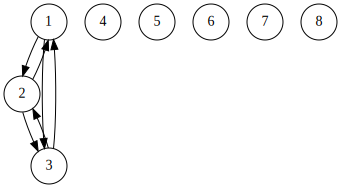

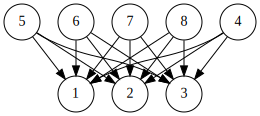

In [13]:
# Maybe slightly more useful?
JupyterSplashDot(DotDigraph(ogs[2]));
JupyterSplashDot(DotDigraph(ogs[5]));
JupyterSplashDot(DotDigraph(ogs[7]));